# Project 2: Digit Recognition

## Statistical Machine Learning (COMP90051), Semester 2, 2017

*Copyright the University of Melbourne, 2017*

### Submitted by:  *Muhammad Ali Qadar*
### Student number: *727121*
### Kaggle-in-class username: * qqaadir *

In this project, you will be applying machine learning for recognising digits from real world images. The project worksheet is a combination of text, pre-implemented code and placeholders where we expect you to add your code and answers. You code should produce desired result within a reasonable amount of time. Please follow the instructions carefully, **write your code and give answers only where specifically asked**. In addition to worksheet completion, you are also expected to participate **live competition with other students in the class**. The competition will be run using an on-line platform called Kaggle.

** Marking:** You can get up to 33 marks for Project 2. The sum of marks for Project 1 and Project 2 is then capped to 50 marks

**Due date:** Wednesday 11/Oct/17, 11:59pm AEST (LMS components); and Kaggle competition closes Monday 09/Oct/17, 11:59pm AEST.

**Late submissions** will incur a 10% penalty per calendar day

** Submission materials**
 - **Worksheet**: Fill in your code and answers within this IPython Notebook worksheet.
 - **Competition**: Follow the instructions provided in the corresponding section of this worksheet. Your competition submissions should be made via Kaggle website.
 - **Report**: The report about your competition entry should be submitted to the LMS as a PDF file (see format requirements in `2.2`).
 - **Code**: The source code behind your competition entry.
The **Worksheet**, **Report** and **Code** should be bundled into a `.zip` file (not 7z, rar, tar, etc) and submitted in the LMS. Marks will be deducted for submitting files in other formats, or we may elect not to mark them at all.

**Academic Misconduct:** Your submission should contain only your own work and ideas. Where asked to write code, you cannot re-use someone else's code, and should write your own implementation. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**Table of Contents**

1. Handwritten Digit Recognition **(16 marks)**
  1. Linear Approach
  2. Basis Expansion
  3. Kernel Perceptron
  4. Dimensionality Reduction
  
2. Kaggle Competition **(17 marks)**
  1. Making Submissions
  2. Method Description

## 1. Handwritten Digit Recognition
Handwritten digit recognition can be framed as a classification task: given a bitmap image as input, predict the digit type (0, 1, ..., 9). The pixel values in each position of the image form our features, and the digit type is the class. We are going to use a dataset where the digits are represented as *28 x 28* bitmap images. Each pixel value ranges between 0 and 1, and represents the monochrome ink intensity at that position. Each image matrix has been flattened into one long feature vector, by concatenating each row of pixels.

In this part of the project, we will only use images of two digits, namely "7" and "9". As such, we will be working on a binary classification problem. *Throughout this first section, our solution is going to be based on the perceptron classifier.*

Start by setting up working environment, and loading the dataset. *Do not override variable `digits`, as this will be used throughout this section.*

Populating the interactive namespace from numpy and matplotlib


C:\Users\mqadar\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


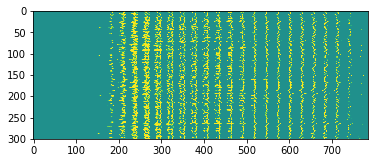

In [46]:
%pylab inline
import matplotlib.image as img
digits = np.loadtxt('digits_7_vs_9.csv', delimiter=' ')
plt.imshow(digits)



Take some time to explore the dataset. Note that each image of "7" is labeled as -1, and each image of "9" is labeled as +1.

-1.0 (300,)


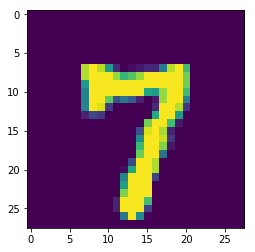

In [48]:
# extract a stack of 28x28 bitmaps
X = digits[:, 0:784]

# extract labels for each bitmap
y = digits[:, 784:785]
y = y.reshape(300)
# display a single bitmap and print its label
bitmap_index = 0
plt.imshow(X[bitmap_index,:].reshape(28, 28), interpolation=None)
print(y[bitmap_index], y.shape)


You can also display several bitmaps at once using the following code.

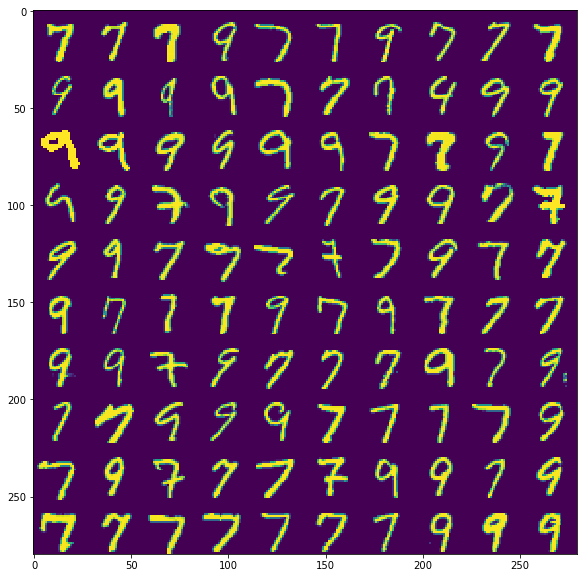

In [49]:
def gallery(array, ncols):
    nindex, height, width = array.shape
    nrows = nindex//ncols
    result = (array.reshape((nrows, ncols, height, width))
              .swapaxes(1,2)
              .reshape((height*nrows, width*ncols)))
    return result

ncols = 10
result = gallery(X.reshape((300, 28, 28))[:ncols**2], ncols)
plt.figure(figsize=(10,10))
plt.imshow(result, interpolation=None)

In [50]:
#Routine for elapsed time 
def tic():
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        T=(time.time() - startTime_for_tictoc )
        print( "Elapsed time is %0.3f" % (T) + " second.")
    else:
        print ("Toc: start time not set")

### 1.1 Linear Approach
We are going to use perceptron for our binary classification task. Recall that perceptron is a linear method. Also, for this first step, we will not apply non-linear transformations to the data.

Implement and fit a perceptron to the data above. You may use the implementation from *sklearn*, or implementation from one of our workshops. Report the error of the fit as the proportion of misclassified examples.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [51]:
def perc_pred(phi, w):
    return np.sign(np.sign(np.dot(phi, w)) + 0.5)

In [52]:
## your code here
def train_perc(data, target, epochs, w , eta=1.):
    for e in range(epochs):
        for i in range(data.shape[0]):
            yhat = perc_pred(data[i,:], w)
            if yhat != target[i]:
                w += eta * target[i] * data[i]
    return w

In [19]:
dummy = np.ones(X.shape[0])
Phi = np.column_stack((dummy, X))
w = np.zeros(Phi.shape[1])
w = train_perc(Phi, y, 1, w)
yHat = perc_pred(Phi, w)
error = np.sum(yHat!= y)/np.float(y.shape[0]) 
acc   = np.sum(yHat == y)/np.float(y.shape[0])
print("Accuracy = " +str(acc))
print("Error of fit = " +str(error))
w = w[1:785]
w1 = w.clip(min =0)
w2 = w.clip(max =0)

Accuracy = 0.87
Error of fit = 0.13


One of the advantages of a linear approach is the ability to interpret results. To this end, plot the parameters learned above. Exclude the bias term if you were using it, set $w$ to be the learned perceptron weights, and run the following command.

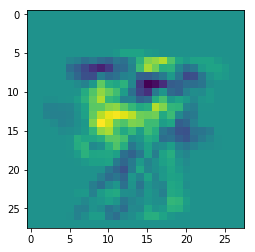

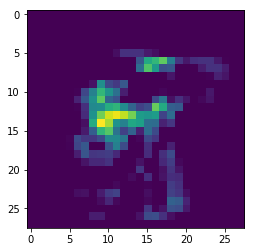

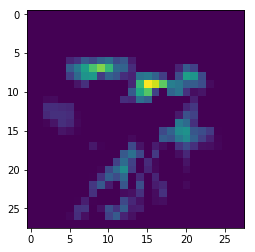

In [20]:
plt.imshow(w.reshape(28,28), interpolation=None)
plt.figure()
plt.imshow(w1.reshape(28,28), interpolation=None)
plt.figure()
plt.imshow(-w2.reshape(28,28), interpolation=None)


In [53]:
from sklearn.linear_model import perceptron
clf = perceptron.Perceptron(n_iter=5, verbose=0, random_state=None, fit_intercept=True, eta0=0.01)
clf.fit(X,y)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=None, shuffle=True,
      verbose=0, warm_start=False)

Accuracy score  97.3333333333%
Error of fit 0.0266666666667


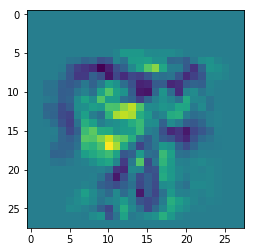

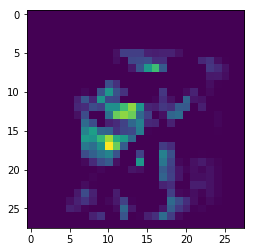

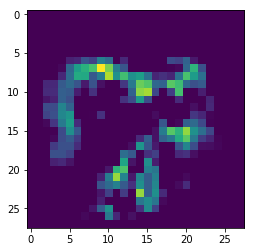

In [54]:
clf.fit(X,y)
w=clf.coef_
w=w.T

#Print the results
print ("Accuracy score  " + str(clf.score(X, y)*100) + "%")
yHat = clf.predict(X)

error = np.sum(yHat != y)/np.float(y.shape[0])
print("Error of fit " + str (error))
plt.imshow(w.reshape(28,28), interpolation=None)
w1 = w.clip(min =0)
w2 = w.clip(max =0)
plt.figure()
plt.imshow(w1.reshape(28,28), interpolation=None)
plt.figure()
plt.imshow(-w2.reshape(28,28), interpolation=None)

In a few sentences, describe what you see, referencing which features are most important for making classification. Report any evidence of overfitting.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)
### Analysis of perceptron algorithm
We can select and interprent most important features using estimated coefficients of percepton model. This can be understood in way that all features have same scale whereas most important features are those with highest coefficients in the model. The features that are not correlated with output variables should have coefficients close to zero. Hence important features lies in the vicinity of highest coefficients.  
I have used both functions from workshop and from sklearn library, both perform similar as the number of interations are increased. The error of fit goes zeros for sklearn at iteration = $10$ and iteration =$5$ for perceptron function from workshop.  
The output image corresponding to estimated perceptron weights exhibit number $7$ and number $9$ mixed up with eachother. I separated both numbers by clipping weight vector for positive and negative values in order to better visualize the output.  
From statistical measures overfitting is evident, at epoch =1 error is $0.13$ with accuracy of $0.87$, however, as we increase epoch number to $5$ there is no misclassification and accuracy is $1.0$ using perceptron function from workshop. This means that data is overtrained and it wouldn't generalized new observations. Therefore, in order to obtain better classification result it is important to choose the training period. This is because of inherent property of perceptron algorithm that it tries to fit maximally to training data which leads to overfitting upon the covergence. This problem can be tackled by trying out perceptron on increasingly variable size of samples or by using averging perceptron algorithm. 

Split the data into training and heldout validation partitions by holding out a random 25% sample of the data. Evaluate the error over the course of a training run, and plot the training and validation error rates as a function of the number of passes over the training dataset.

<br />
<font color='red'>**Write your code in the cell below ...**</font>

In [72]:
## your code here
#Split the data into test and train
from sklearn.model_selection import train_test_split
  
X_train, X_heldout, y_train, y_heldout = train_test_split(X, y, test_size=0.25, random_state=0)


x_dummy_train = np.ones(X_train.shape[0])
x_dummy_heldout = np.ones(X_heldout.shape[0])

Phi_train = np.column_stack((x_dummy_train,X_train))
Phi_heldout  = np.column_stack((x_dummy_heldout,X_heldout))
print(Phi_train.shape,Phi_heldout.shape, y_train.shape, y_heldout.shape)


(225, 785) (75, 785) (225,) (75,)


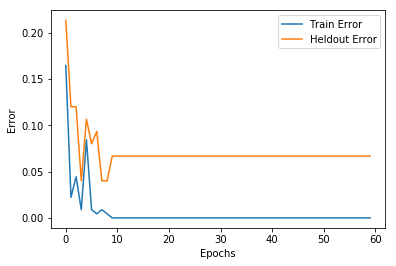

In [56]:
w_hat = np.zeros(Phi_train.shape[1])

T = 60
train_error = np.zeros(T)
heldout_error = np.zeros(T)
clf = perceptron.Perceptron(n_iter=1000, verbose=0, random_state=32, fit_intercept=True, eta0=0.01)

for ep in range(T):
    clf.partial_fit(X_train,y_train, classes = np.unique(y_train))
    w_hat=clf.coef_
    w_hat=w_hat.T
    y_pred = clf.predict(X_heldout)    
    train_error[ep] = np.sum(clf.predict(X_train) != y_train) / np.float(y_train.shape[0])
    heldout_error[ep] = np.sum(y_pred != y_heldout) / np.float(y_heldout.shape[0])
plot(train_error, label = 'Train Error')
plot(heldout_error, label = 'Heldout Error')
plt.legend()
xlabel('Epochs')
ylabel('Error')

In a few sentences, describe the shape of the curves, and compare the two. Now consider if we were to stop training early, can you choose a point such that you get the best classification performance? Justify your choice.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)
### Perceptron early stopping
The graph above shows that heldout error is closely tracking the training error. The heldout error and training error decreases monotonically, this exhibit learning of perceptron has been successful and we have avoided overfitting. However, if both errors remains large while tracking closely this results in underfitting. Early stopping is when 

1. The heldout error reaches it minimum value
2. Training has been stopped after few iterations

and it is performed by heuristic or by perpetual observation of heldout error. By examining both curves we can see that heldout error has been fluctuating for epochs between $1$ to $10$, this is mainly due to severly distorted digits in the data. We can stop after epoch  = $9$ where the heldout error is minimum and the model is not training any more  as it has become stable. This is analogues to convergence theorem of perceptron which states that perceptron algorithm is guaranteed to determine weight vectors corresponding to the perceptron hyperplane in finite number of iterations if the data matrix of features is linearly separable 
$(Bishop, 2006).$  However, if data is not linearly separable then perceptron learning does not converge. 


Now that we have tried a simple approach, we are going to implement several non-linear approaches to our task. Note that we are still going to use a linear method (the perceptron), but combine this with a non-linear data transformation. We start with basis expansion.

### 1.2 Basis Expansion
Apply Radial Basis Function (RBF)-based transformation to the data, and fit a perceptron model. Recall that the RBF basis is defined as

$$\varphi_l(\mathbf{x}) =  \exp\left(-\frac{||\mathbf{x} - \mathbf{z}_l||^2}{\sigma^2}\right)$$

where $\mathbf{z}_l$ is centre of the $l^{th}$ RBF. We'll use $L$ RBFs, such that $\varphi(\mathbf{x})$ is a vector with $L$ elements. The spread parameter $\sigma$ will be the same for each RBF.

*Hint: You will need to choose the values for $\mathbf{z}_l$ and $\sigma$. If the input data were 1D, the centres $\mathbf{z}_l$ could be uniformly spaced on a line. However, here we have 784-dimensional input. For this reason you might want to use some of the training points as centres, e.g., $L$ randomly chosen "9"s and "7"s.*

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [57]:
def rbf_kernel(X, A, s):
    m,n = X.shape
    K = (np.zeros((m,n)))
    for j in range(m):
        dRow = X[j,:] - A
        K[j,:] = dRow*dRow.T
    K =exp(K/-1*s**2)
    return K

Now compute the validation error for your RBF-perceptron and use this to choose good values of $L$ and $\sigma$. Show a plot of the effect of changing each of these parameters, and justify your parameter choice.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

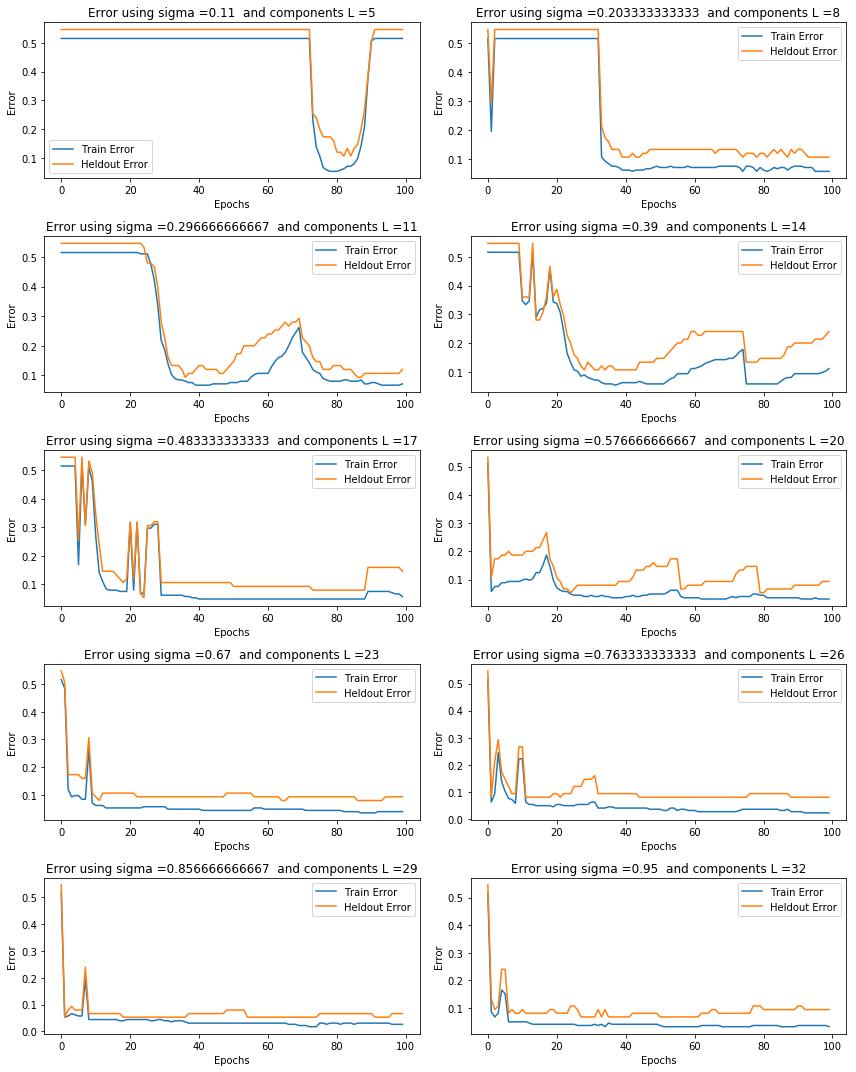

In [58]:

n_rbf = 10
s = np.linspace (0.11, 0.95, n_rbf)
# s = 0.66
# s = np.repeat(s, 10)
# np.random.seed(1)
idx = np.random.permutation(X.shape[0])
fig1 = plt.figure(figsize =(12, 15))
for k in range(n_rbf): 
    A = X[idx[0:5+3*(k)],:] 
    for i in range(A.shape[0]):
        K = rbf_kernel (X, A[i, :], s[k])
        
    K_train, K_heldout, y_train, y_heldout = train_test_split(K, y, test_size=0.25, random_state = 0)
 
    x_dummy_train  = np.ones (K_train.shape[0])
    x_dummy_heldout = np.ones(K_heldout.shape[0])
    Phii_train = np.column_stack((x_dummy_train,K_train))
    Phii_heldout  = np.column_stack((x_dummy_heldout,K_heldout))

    w_hat = np.zeros(Phi_train.shape[1])
    T = 100
    train_error = np.zeros(T)
    heldout_error = np.zeros(T)
    for ep in range(T):
        # here we use a learning rate, which decays with each epoch
        lr = 1./(1+ep)
        w_hat = train_perc(Phii_train, y_train, 1, w_hat, eta = lr )
        train_error[ep] = np.sum(perc_pred(Phii_train, w_hat) != y_train) / np.float(y_train.shape[0])
        heldout_error[ep] = np.sum(perc_pred(Phii_heldout, w_hat) != y_heldout) / np.float(y_heldout.shape[0])
    fig1.add_subplot(n_rbf/2, 2, k+1)
    plt.plot(train_error, label = 'Train Error')
    plt.plot(heldout_error, label = 'Heldout Error')
    plt.title('Error using sigma =' + str(s[k]) + '  and components L =' +str(5+3*(k)))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.tight_layout()

<font color='red'>**Write your justfication here ...**</font> (as a *markdown* cell)
### RBF-Perceptron

For this task I used perceptron function from workshop.
<div align = "justify">  
In order to utilize the RBF percepton learning one has to compute the weights and RBF centers. There are various ways to choose RBF centers, either we can use random subset of training examples or centers can be determined by clustering. We can select random set from training data as the training set represent perpceptron learning problem. However, if the training data is not large enough or training set do not represent perceptron learning problem then learning process could lead to misclassification. We declared a randomly permuted vector to select the subsequent set of training data. It is possible that particular random subset center do not perform well therefore, we should try to select another set until satisfactory classification peformance is acheived. In RBF $\sigma$ is a constant and decides width of the Gaussian distribution, in order to acheive desired performance one has to select optimal values for $\sigma$ and $L.$ By increasing number of RBF centers heldout error improves however, computation time grows, therefore, it is desireable to achieve good accuracy using fewer RBF components. It is observed that higher values of sigma between $0.57$ to $0.95$ the heldout and training errors are quite stable and exhibit lesser fluctutations as compared to lower values $\sigma$. In general at large values of $\sigma$ RBF basis started to behave as almost linear basis functions. Furthermore, as the number of centers grows e.g at $L = 20 - 30$ both error rates started to track eachother closely. In order to visualize this effect we ran perceptron learning with fixed $\sigma$ and changing $L$ and vice versa. We examined that error rate is non fluctuating using $\sigma = 0.66$ along with number of centers set between $23-32.$ On additional note, in order to select optimal parameters one can utilize gridsearch criteria.</div>

### 1.3 Kernel Perceptron
Next, instead of directly computing a feature space transformation, we are going to use the kernel trick. Specifically, we are going to use the kernelised version of perceptron in combination with a few different kernels.

*In this section, you cannot use any libraries other than `numpy` and `matplotlib`.*

First, implement linear, polynomial and RBF kernels. The linear kernel is simply a dot product of its inputs, i.e., there is no feature space transformation. Polynomial and RBF kernels should be implemented as defined in the lecture slides.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [59]:
# Input:
# u,v - column vectors of the same dimensionality
#
# Output:
# v - a scalar
def linear_kernel(u, v):
    ## your code here
    return np.dot(u, v)
# Input:
# u,v - column vectors of the same dimensionality
# c,d - scalar parameters of the kernel as defined in lecture slides
#
# Output:
# v - a scalar
def polynomial_kernel(u, v, c=0, d=3):
    ## your code here
    return (c+ np.dot(u,v))**d
    
# Input:
# u,v - column vectors of the same dimensionality
# gamma - scalar parameter of the kernel as defined in lecture slides
#
# Output:
# v - a scalar
def rbf_kernel(u, v, gamma=1):
    ## your code here
    Sqdist=(np.linalg.norm(u-v)**2)
    return (np.exp(-gamma*Sqdist))
   
    

Kernel perceptron was a "green slides" topic, and you will not be asked about this method in the exam. Here, you are only asked to implement a simple prediction function following the provided equation. In kernel perceptron, the prediction for instance $\mathbf{x}$ is made based on the sign of

$$w_0 + \sum_{i=1}^{n}\alpha_i y_i K(\mathbf{x}_i, \mathbf{x})$$

Here $w_0$ is the bias term, $n$ is the number of training examples, $\alpha_i$ are learned weights, $\mathbf{x}_i$ and $y_i$ is the training dataset,and $K$ is the kernel.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [68]:
#%%

# Input:
# x_test - (r x m) matrix with instances for which to predict labels
# X - (n x m) matrix with training instances in rows
# y - (n x 1) vector with labels
# alpha - (n x 1) vector with learned weigths
# bias - scalar bias term
# kernel - a kernel function that follows the same prototype as each of the three kernels defined above
#
# Output:
# y_pred - (r x 1) vector of predicted labels
def kernel_ptron_predict(x_test, X, y, alpha, bias, kernel):
    ## your code here
    s = 0
    # Kernel function
    for j in range(y.shape[0]):
        s += (alpha[j]*y[j]*kernel(X[j], x_test))
    y_pred = np.sign(s+bias) 
    return y_pred

The code for kernel perceptron training is provided below. You can treat this function as a black box, but we encourage you to understand the implementation.

In [69]:
# Input:
# X - (n x m) matrix with training instances in rows
# y - (n x 1) vector with labels
# kernel - a kernel function that follows the same prototype as each of the three kernels defined above
# epochs - scalar, number of epochs
#
# Output:
# alpha - (n x 1) vector with learned weigths
# bias - scalar bias term
def kernel_ptron_train(X, y, kernel, epochs=100):
    n, m = X.shape
    alpha = np.zeros(n)
    bias = 0
    updates = None
    for epoch in range(epochs):
        print('epoch =', epoch, ', updates =', updates)
        updates = 0

        schedule = list(range(n))
        np.random.shuffle(schedule)
        for i in schedule:
            y_pred = kernel_ptron_predict(X[i], X, y, alpha, bias, kernel)
            
            if y_pred!= y[i]:
                alpha[i] += 1
                bias += y[i]
                updates += 1

        if updates == 0:
            break
        
    return alpha, bias

Now use the above functions to train the perceptron. Use heldout validation, and compute the validation error for this method using each of the three kernels. Write a paragraph or two with analysis how the accuracy differs between the different kernels and choice of kernel parameters. Discuss the merits of a kernel approach versus direct basis expansion approach as was used in the previous section.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [73]:
tic()
alpha, bias = kernel_ptron_train(Phi_train, y_train, linear_kernel, epochs =100)
toc()
tic()
alpha_p, bias_p = kernel_ptron_train(Phi_train, y_train, polynomial_kernel, epochs = 100)
toc()
tic()
alpha_r, bias_r = kernel_ptron_train(Phi_train, y_train,  rbf_kernel, epochs = 100)
toc()

epoch = 0 , updates = None
epoch = 1 , updates = 32
epoch = 2 , updates = 15
epoch = 3 , updates = 12
epoch = 4 , updates = 4
epoch = 5 , updates = 4
Elapsed time is 0.493 second.
epoch = 0 , updates = None
epoch = 1 , updates = 29
epoch = 2 , updates = 11
epoch = 3 , updates = 2
epoch = 4 , updates = 1
Elapsed time is 0.506 second.
epoch = 0 , updates = None
epoch = 1 , updates = 46
epoch = 2 , updates = 1
epoch = 3 , updates = 1
Elapsed time is 1.426 second.


In [74]:

y_pred_ts = np.zeros(X_heldout.shape[0])
y_pred_ts_p = np.zeros(X_heldout.shape[0])
y_pred_ts_r = np.zeros(X_heldout.shape[0])
for i in range(X_heldout.shape[0]):
    y_pred_ts[i]  = kernel_ptron_predict(X_heldout[i], X_train, y_train,alpha, bias, linear_kernel)
    y_pred_ts_p[i]  = kernel_ptron_predict(X_heldout[i], X_train, y_train,alpha_p, bias_p, polynomial_kernel)
    y_pred_ts_r[i]  = kernel_ptron_predict(X_heldout[i], X_train, y_train,alpha_r, bias_r, rbf_kernel)
  
print("Misclassified examples using linear kernel     " +str (np.count_nonzero(y_heldout- y_pred_ts)))
print("Misclassified examples using polynomial kernel " +str (np.count_nonzero(y_heldout- y_pred_ts_p)))
print("Misclassified examples using rbf kernel        " +str (np.count_nonzero(y_heldout- y_pred_ts_r)))


Misclassified examples using linear kernel     4
Misclassified examples using polynomial kernel 3
Misclassified examples using rbf kernel        8


<font color='red'>**Provide your analysis here ...**</font> (as a *markdown* cell)

### Analysis of Kernel functions

As we know kennel functions provide a way to compute dot product between two vectors in a high dimensional feature space. In general there are three types of kernels, linear, polynomial and radial basis, here we describe and compare performance differences of each kernel using kernalized perceptron algorithm. 

***Linear kernel***

Linear kernel allows us to use linear functions, linear kernel generally has lower computational complexity as compared to polynomial or rbf kernel. We can see that using linear kernel accuracy is 96% where only 4 examples were misclassified.  

***Polynomial kernel ***

Polynomials kernels allows us to learn nonlinear models. Using polynomial kernel miclassified examples are lowest as compared to RBF or linear kernel and computational complexity is lower than RBF kernel. In general, parametric model's assumptions is that polynomials kernel performance suffer because of saturation after some point where giving it more data to model does not help to improve accuracy. Furthermore, higher number of hyper parameters in polynomial kernel effect the model complexity.

*** RBF kernel***

RBF kernel is most popular because of its flexibility and due to nonparameteric model's assumption i.e it can define a function space that is much larger that linear or polynomial kernels. As we can see that RBF kernel has converged in lowest epochs than linear and polynomial kernel. Misclassified examples in case of RBF kernel are highest this is because of larger  feature space in data and mapping the data to high dimensional space in such cases using RBF is not a good idea. Therefore, nonlinear mapping does not improve upon accuracy $(Hsu, 2007)$. 

**Kernel Perceptron vs RBF Perceptron **

There are several benefits of using Kernel perceptron as compared to basis expansion.

Kernel perceptron does not require to construct basis function as compared to RBF  perceptron.  By using Kernel approach  one can find nonlinear patterns in a reasonable time as the complexity of Kernel approach is a function of training instances instead of number of input dimensions. Cost function of Kernel approach is convex therefore global minima exists and it is robust to high dimensional feature space.  

One disadvantage of basis expansion approach is the choice of degree of basis  and how to decide which basis function will separate two classes. Furthemore these basis expands in proportion with feature set size which is a computational hurdle. Regarding accuracy we can see that kernel perceptron have much lesser misclassified examples as compared to RBF basis expansion perceptron which proves the supermacy of Kernel percetron. 


### 1.4 Dimensionality Reduction
Yet another approach to working with complex data is to use a non-linear dimensionality reduction. To see how this might work, first apply a couple of dimensionality reduction methods and inspect the results.

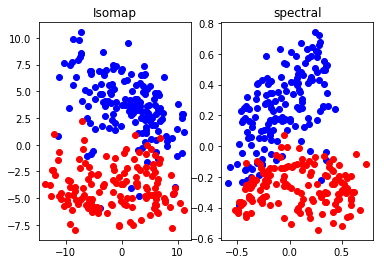

In [75]:
from sklearn import manifold

X = digits[:, 0:784]
y = np.squeeze(digits[:, 784:785])

# n_components refers to the number of dimensions after mapping
# n_neighbors is used for graph construction
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)

# n_components refers to the number of dimensions after mapping
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0)
X_se = embedder.fit_transform(X)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_iso[y==-1,0], X_iso[y==-1,1], "bo")
ax1.plot(X_iso[y==1,0], X_iso[y==1,1], "ro")
ax1.set_title('Isomap')
ax2.plot(X_se[y==-1,0], X_se[y==-1,1], "bo")
ax2.plot(X_se[y==1,0], X_se[y==1,1], "ro")
ax2.set_title('spectral')

In a few sentences, explain how a dimensionality reduction algorithm can be used for your binary classification task.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)
### Dimensionality reduction for binary classification

Dimensionality reduction is useful to compress the underlying data and find the direction of maximum variance. In order to perform classification with non linear dimensionality reduction methods for example Isomap (projects  data to lower dimension using multidimensional scaling (MDS) approach) we can use clustering algorithm e.g K-means to predict labels and use these predicted labels to visualize classification performance. A stepwise procedure would be 

1. Transform data using dimensionality reduction method
2. Use the reduced data to predict labels 
3. Assess the performance by using various evaluation metrics
4. if accuracy is statisfactory we can terminate algorithm else go to step 1 and choose different number of component to reduce the data

In subsequent section, we inspected results of dimensionality reduction for Isomap and PCA using K-means clustering.

Implement such an approach and assess the result. For simplicity, we will assume that both training and test data are available ahead of time, and thus the datasets should be used together for dimensionality reduction, after which you can split off a test set for measuring generalisation error. *Hint: you do not have to reduce number of dimensions to two. You are welcome to use the sklearn library for this question.*
 
<br />

<font color='red'>**Write your code in the cell below ...**</font>

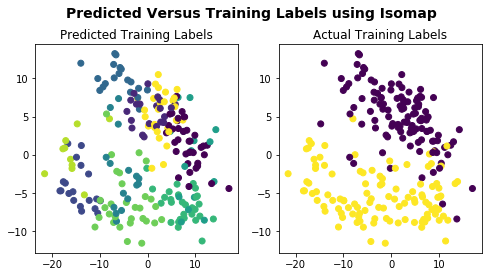

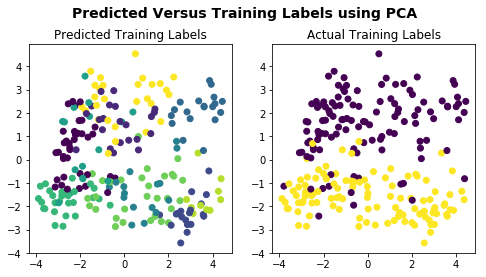

In [76]:
# Trying out between dimentionality reduction between PCA vs ISOMAP
from sklearn import cluster
from sklearn.decomposition import PCA
import sklearn.cross_validation
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics
from sklearn import manifold
from sklearn.model_selection import train_test_split

#Splitting data into training and test
X_train, X_heldout, y_train, y_heldout = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_iso =manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(X_train)

# Initialize K-means model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=0)

# Fit the training data to the model
clf.fit(X_train)

# Compute cluster centers and predict cluster index for each sample
y_clusters = clf.fit_predict(X_train)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

fig.suptitle('Predicted Versus Training Labels using Isomap', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=y_clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Fit PCA model to the training data
X_pca = PCA(n_components=2).fit_transform(X_train)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# Adjust layout
fig.suptitle('Predicted Versus Training Labels using PCA', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

The visualization by PCA reveals the representation capacity of the model. We can see that PCA does exhibit lower separation capability of data points as compared to Isomap. Therefore, we choose to work with Isomap for classification of digits. Following code utilizes K-fold validation to generate alternate datasets and Isomap for dimensionality reduction, furthermore it uses gridsearch to find the best $K$ parameters to train K-nearest neighbour classifier.   

In [78]:
from sklearn.metrics import accuracy_score
def calc_scores (x_test, y_test, clf, cv):
    kfolds = sklearn.cross_validation.KFold(x_test.shape[0], n_folds= cv)
    sc =[]
    for i, j in kfolds:
        test_set = x_test[j]
        test_labels = y_test[j]
        sc.append(accuracy_score(test_labels, clf.predict(test_set)))
    return sc

Best number of parameter k  [20, 19, 9, 12, 3, 5, 3, 5, 5, 5]
[ 0.64107143  0.93214286  0.94464286  0.93214286  0.96071429  0.96071429
  0.93214286  0.94642857  0.96071429  0.96071429]


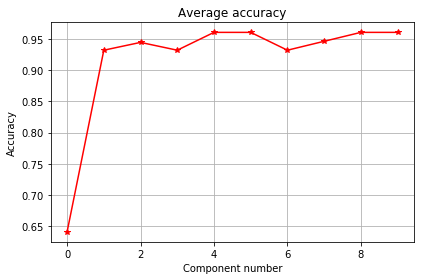

In [79]:
k = np.arange(20)+1
parameters  = {'n_neighbors': k}
knn = sklearn.neighbors.KNeighborsClassifier()
clf = sklearn.grid_search.GridSearchCV(knn, parameters, cv = 10)
accuracy = []
accu =np.zeros(11)
Best_params = []
# fig= plt.figure(figsize=(15, 12))
Dim  = [1,2, 3, 4, 5,6,7,8,9,10]
index = 1
for i in Dim:
    isoX = manifold.Isomap(n_components=i)
    if i<32:
        X_train_fit  = isoX.fit_transform(X_train)
        X_heldout_fit = isoX.transform(X_heldout)
    else:
        X_tr = X_train
        X_ts = X_heldout
    clf.fit(X_train_fit, y_train)
    acc = calc_scores(X_heldout_fit, y_heldout, clf, cv = 10)
    accu[i]= np.sum(acc)/len(acc)
    
    Best_params.append(clf.best_params_['n_neighbors'])
    
accu = accu[1:11]
# fig.add_subplot(5,2,index)
plt.plot(accu, '-r*')
plt.title("Average accuracy")
plt.xlabel("Component number")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.grid()
print("Best number of parameter k  " + str(Best_params))
print(accu)

In a few sentences, comment on the merits of the dimensionality reduction based approach compared to linear classification from Section 1.1 and basis expansion from Section 1.2.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)
<div align = 'justify'>
Dimensionality reduction is a criteria to represent given data using smaller number of variables while preserving the underlying structure in the data. In this task we have utilized K-nearest neighbor algorithm and cross validation in order estimate best $K$ value. In order to explore nonlinear dimensionality reduction I have used Isomap where training data is reduced to different number of components in incremental way. Then I have utilized grid search to find the best number  of clustering parameter $K$. Above graph shows average accuracy for 10-fold cross validation criteria using isomap dimensionality reduction method and K-nearest neighbor as the classifier.  As we can see at different number of components maximum accuracy is 0.96 where misclassification is only 0.04. Furthemore, we have shown best number of parameters for K-nearest neighbor with each incremental dimentionality component. 


**Comparison with linear approach** 


In comparison to linear approach nonlinear dimensionality reduction techniques like isomap  successfully characterize a subspace where data is linearly inseparable. By reducing data dimensions one can visualize pattens in the data, reduce computational cost and obvious advantage is data compression. Furthermore, isomap is capable of producing globally optimal low dimensional representation despite of highly curved input space and it gaurantees to recover original dimensionality. Whereas linear approach reconstructs whole dataset which is computationally expensive and unreliable if in case data contains small degree of nonlinearity.   


**RBF basis expansion**


The core simmilarity between radial basis and isomap approach is that both methods can handle nonlinearities in the data. Radial basis transformation has it's limitation, it requires to choose the size of features and RBF center has to be defined beforehand. As the size of dataset increases RBF basis expands in feature size as result of which computation cost goes higher. Besides their limitation, RBF's are powerfull tool to linearlize any nonlinearity in the data and these functions are differentiable at each point which exhibit their capability to represent complex relationships with increasing amount of data. Whereas isomap as described earlier inherently provide excellent visualization of data points and they consider geodesic distance instead of euclidean distances between data points. Furthermore, RBF do not provide dimensionality reduction as compared Isomap and classification accuracy is better in case of isomap.


## 2. Kaggle Competition
The final part of the project is a competition, on more challenging digit data sourced from natural scenes. This data is coloured, pixelated or otherwise blurry, and the digits are not perfectly centered. It is often difficult for humans to classify! The dataset is also considerably larger. 

Please sign up to the [COMP90051 Kaggle competition](https://inclass.kaggle.com/c/comp90051-2017) using your `student.unimelb.edu.au` email address. Then download the file `data.npz` from Kaggle. This is a compressed `numpy` data file containing three ndarray objects:
 - `train_X` training set, with 4096 input features (greyscale pixel values);
 - `train_Y` training labels (0-9)
 - `test_X` test set, with 4096 input features, as per above
 
Each image is 64x64 pixels in size, which has been flattened into a vector of 4096 values. You should load the files using `np.load`, from which you can extract the three elements. You may need to transpose the images for display, as they were flattened in a different order. Each pixel has an intensity value between 0-255. For those using languages other than python, you may need to output these objects in another format, e.g., as a matlab matrix.

Your job is to develop a *multiclass* classifier on this dataset. You can use whatever techniques you like, such as the perceptron code from above, or other methods such as *k*NN, logistic regression, neural networks, etc. You may want to compare several methods, or try an ensemble combination of systems. You are free to use any python libraries for this question. Note that some fancy machine learning algorithms can take several hours or days to train (we impose no time limits), so please start early to allow sufficient time. *Note that you may want to sample smaller training sets, if runtime is an issue, however this will degrade your accuracy. Sub-sampling is a sensible strategy when developing your code.*

You may also want to do some basic image processing, however, as this is not part of the subject, we would suggest that you focus most of your efforts on the machine learning. For inspiration, please see [Yan Lecun's MNIST page](http://yann.lecun.com/exdb/mnist/), specifically the table of results and the listed papers. Note that your dataset is harder than MNIST, so your mileage may vary.

### 2.1 Making Submissions

This will be setup as a *Kaggle in class* competition, in which you can upload your system predictions on the test set. You should format your predictions as a csv file, with the same number of lines as the test set, and each line comprising two numbers `id, class` where *id* is the instance number (increasing integers starting from 1) and *class* is an integer between 0-9, corresponding to your system prediction. E.g., 
```
Id,Label
1,9
2,9
3,4
4,5
5,1
...```
based on the first five predictions of the system being classes `9 9 4 5 1`. See the `sample_submission.csv` for an example file.

Kaggle will report your accuracy on a public portion of the test set, and maintain a leaderboard showing the performance of you and your classmates. You will be allowed to upload up to four submissions each day. At the end of the competition, you should nominate your best submission, which will be scored on the private portion of the test set. The accuracy of your system (i.e., proportion of correctly classified examples) on the private test set will be used for grading your approach.

**Marks will be assigned as follows**:
 - position in the class, where all students are ranked and then the ranks are linearly scaled to <br>0 marks (worst in class) - 4 marks (best in class) 
 - absolute performance (4 marks), banded as follows (rounded to nearest integer): 
 <br>below 80% = 0 marks; 80-89% = 1; 90-92% = 2; 93-94% = 3; above 95% = 4 marks

Note that you are required to submit your code with this notebook, submitted to the LMS. Failure to provide your implementation may result in assigning zero marks for the competition part, irrespective of the competition standing. Your implementation should be able to exactly reproduce submitted final Kaggle entry, and match your description below.

### 2.2. Method Description
Describe your approach, and justify each of the choices made within your approach. You should write a document with no more than 400 words, as a **PDF** file (not *docx* etc) with up to 2 pages of A4 (2 sides). Text must only appear on the first page, while the second page is for *figures and tables only*. Please use a font size of 11pt or higher. Please consider using `pdflatex` for the report, as it's considerably better for this purpose than wysiwyg document editors. You are encouraged to include empirical results, e.g., a table of results, graphs, or other figures to support your argument. *(this will contribute 9 marks; note that we are looking for clear presentation, sound reasoning, good evaluation and error analysis, as well as general ambition of approach.)*